In [54]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns
import scipy.stats

%matplotlib inline

sns.set_style("ticks")

In [55]:
mydir = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/'

In [56]:
metadata_file = mydir+'data/metadata/sample_tracking.tsv'
metadata_df = pd.read_csv(metadata_file, sep='\t')

metadata_df = metadata_df.set_index('sanger_sample_id', drop=False)

# metadata_df = metadata_df[['treatment']]

metadata_df.head()

,sample_id,run,plate_barcode,date_of_submission,name,pool_id,protocol,bio_replicate_id,tech_replicate_id,10x_replicate_id,time_point,treatment,code,sequencescape,sanger_sample_id,number_of_cells_loaded,percentage_survival,comment
sanger_sample_id,,,,,,,,,,,,,,,,,,
5245STDY7352549,cellranger211_count_25419_5245STDY7352549_hg19...,25419,SCGC-10X-00003100,21-02-2018,Pool1_1,pool1,da_neurons,1,1,1,D11,NONE,5245STDY7352549,3571764.0,5245STDY7352549,15480,94.4,NaN
5245STDY7352550,cellranger211_count_25419_5245STDY7352550_hg19...,25419,SCGC-10X-00003101,21-02-2019,Pool1_2,pool1,da_neurons,1,2,1,D11,NONE,5245STDY7352550,3571765.0,5245STDY7352550,11390,91.9,NaN
5245STDY7352551,cellranger211_count_25419_5245STDY7352551_hg19...,25419,SCGC-10X-00003102,21-02-2020,Eipl/Podx,eipl_podx,da_neurons,1,1,1,D11,NONE,5245STDY7352551,3571766.0,5245STDY7352551,17812,94.4,NaN
5245STDY7386983,cellranger211_count_25528_5245STDY7386983_hg19...,25528,SCGC-10X-00003980,21-02-2021,UENN/HECN,uenn_hecn,da_neurons,1,1,1,D11,NONE,5245STDY7386983,3606205.0,5245STDY7386983,11600,93,NaN
5245STDY7386984,cellranger211_count_25528_5245STDY7386984_hg19...,25528,SCGC-10X-00003981,21-02-2022,Pelm/Meue,pelm_meue,da_neurons,1,1,1,D11,NONE,5245STDY7386984,3606206.0,5245STDY7386984,19400,97,NaN


In [57]:
metadata_file = mydir+'data/metadata/sample_tracking.tsv'
metadata_df = pd.read_csv(metadata_file, sep='\t')

metadata_df = metadata_df.set_index('sanger_sample_id', drop=False)

# metadata_df = metadata_df[['treatment']]

metadata_df.head()

,sample_id,run,plate_barcode,date_of_submission,name,pool_id,protocol,bio_replicate_id,tech_replicate_id,10x_replicate_id,time_point,treatment,code,sequencescape,sanger_sample_id,number_of_cells_loaded,percentage_survival,comment
sanger_sample_id,,,,,,,,,,,,,,,,,,
5245STDY7352549,cellranger211_count_25419_5245STDY7352549_hg19...,25419,SCGC-10X-00003100,21-02-2018,Pool1_1,pool1,da_neurons,1,1,1,D11,NONE,5245STDY7352549,3571764.0,5245STDY7352549,15480,94.4,NaN
5245STDY7352550,cellranger211_count_25419_5245STDY7352550_hg19...,25419,SCGC-10X-00003101,21-02-2019,Pool1_2,pool1,da_neurons,1,2,1,D11,NONE,5245STDY7352550,3571765.0,5245STDY7352550,11390,91.9,NaN
5245STDY7352551,cellranger211_count_25419_5245STDY7352551_hg19...,25419,SCGC-10X-00003102,21-02-2020,Eipl/Podx,eipl_podx,da_neurons,1,1,1,D11,NONE,5245STDY7352551,3571766.0,5245STDY7352551,17812,94.4,NaN
5245STDY7386983,cellranger211_count_25528_5245STDY7386983_hg19...,25528,SCGC-10X-00003980,21-02-2021,UENN/HECN,uenn_hecn,da_neurons,1,1,1,D11,NONE,5245STDY7386983,3606205.0,5245STDY7386983,11600,93,NaN
5245STDY7386984,cellranger211_count_25528_5245STDY7386984_hg19...,25528,SCGC-10X-00003981,21-02-2022,Pelm/Meue,pelm_meue,da_neurons,1,1,1,D11,NONE,5245STDY7386984,3606206.0,5245STDY7386984,19400,97,NaN


In [58]:
file = mydir+'data/data_processed/lancaster_organoids/lancaster_organoids.scanpy.w_metadata.w_celltype.scanpy.h5'
adatafull = sc.read(file)



Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [59]:
adatafull.n_obs

11444

In [60]:
adatafull.obs.head()

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,pct_counts_mito,sample_id,total_counts,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype
index,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCTCCTCT-1-0,0,HPSI1014i-eesb_1,7.633854,8.519391,4.828314,2066,41.936128,51.996008,66.247505,31.177645,2.475050,5245STDY7770225,5010.0,124.0,0,D119,pool4,NONE,5010.0,neural
AAACCTGAGGCTCTTA-1-0,0,HPSI1014i-eesb_1,7.491645,8.318254,4.477337,1792,42.494508,52.745912,68.367098,31.120332,2.123505,5245STDY7770225,4097.0,87.0,0,D119,pool4,NONE,4097.0,neural
AAACCTGAGTACGCGA-1-0,0,HPSI1213i-hehd_1,7.831617,8.721929,1.609438,2518,39.429503,48.916055,61.955990,29.535452,0.065200,5245STDY7770225,6135.0,4.0,0,D119,pool4,NONE,6135.0,neural
AAACCTGCAATGACCT-1-0,0,HPSI1014i-eesb_1,7.886833,9.030496,4.330733,2661,40.165210,51.370765,66.503053,28.385011,0.897881,5245STDY7770225,8353.0,75.0,2,D119,pool4,NONE,8353.0,glial
AAACCTGCACAGACAG-1-0,0,HPSI1213i-hehd_1,7.903966,9.190648,4.369448,2707,51.652387,60.964912,72.246022,36.678907,0.795594,5245STDY7770225,9804.0,78.0,2,D119,pool4,NONE,9804.0,glial


In [61]:
#subsample

fraction = 1.0
adata = sc.pp.subsample(adatafull, fraction, copy=True)

# selected_pools = ['pool10','pool11','pool12']
# adata = adatafull[adatafull.obs['pool_id'].isin(selected_pools),: ]


# log quantification data and store as "raw"
adata.raw = sc.pp.log1p(adata, copy=True)

In [62]:
# order celltypes so that 
celltype_list = ['neural','neuroblast','glial','satellite','mesenchymal','myotubule','PAX7_positive','wnt_positive']
cat_type = pd.CategoricalDtype(categories=celltype_list, ordered=True)
adata.obs['celltype'] = adata.obs['celltype'].astype(cat_type)

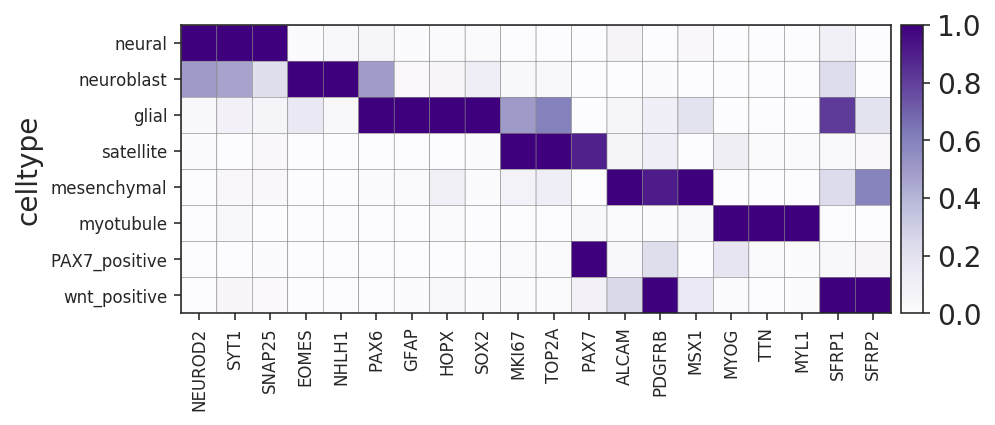

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[6.4, 0, 0.2])

In [63]:
# gene_list=['MKI67', 'TOP2A', 'KIAA1524', 'ZEB2', 'DMBX1', 'HMGA1', 'HMGA2', 'HMGB2',
#            'NEUROG1', 'NEUROD1', 'NEUROG2', 'NHLH1', 'SIM1',
#            'SYT1', 'SNAP25',
#            'FOXA2', 'LMX1A',
#            'EOMES', 'RELN','CALB2', 'EBF3', 'SAMD3', 'EMX2',
#            'TPH1', 'TPH2', 'SLC18A1', 'TAC1', 'GATA2','ASCL1',
#            'NR4A2', 'ATP13A2', 'PBX1', 'LMO3', 'ZFP69B', 'TMCC3',
#            'S100B', 'AQP4', 'GFAP', 'VIM', 'SLC1A3','SOX9',
#            'STOML3','CCDC153','CDHR4','FOXJ1','DNAH11','TTR','MLF1']

gene_list=['NEUROD2','SYT1','SNAP25','EOMES','NHLH1',
           'PAX6','GFAP','HOPX','SOX2',
           'MKI67','TOP2A','PAX7',
           'ALCAM','PDGFRB','MSX1',
           'MYOG','TTN','MYL1',
          'SFRP1','SFRP2']

sc.pl.matrixplot(adata, var_names=gene_list,
                 groupby='celltype', standard_scale='var', cmap='Purples')

In [64]:
adata.obs['celltype'].cat.categories

Index(['neural', 'neuroblast', 'glial', 'satellite', 'mesenchymal',
       'myotubule', 'PAX7_positive', 'wnt_positive'],
      dtype='object')

In [65]:
old_to_new = dict(
    neural = 'neuron',
    neuroblast = 'intermediate_prog',
    glial = 'radial_glial_prog', 
    satellite = 'satellite', 
    mesenchymal = 'mesenchymal', 
    myotubule = 'myotube',
    PAX7_positive = 'PAX7_positive',
    wnt_positive = 'wnt_positive'
)
adata.obs['celltype_new'] = (
    adata.obs['celltype']
    .map(old_to_new)
    .astype('category')
)

In [66]:
ordering = ['intermediate_prog', 'neuron', 'radial_glial_prog', 'myotube','mesenchymal',
       'satellite','PAX7_positive', 'wnt_positive']

cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_new'] = adata.obs['celltype_new'].astype(cat_type)
adata.obs['celltype_new']

index
GCGCGATAGCTAAACA-1-1          myotube
CCCTCCTCATTAGGCT-1-1        satellite
GGGCACTCAAACTGCT-1-0           neuron
GTGCTTCCACTTAAGC-1-1        satellite
TCTGAGAGTCGTGGCT-1-0           neuron
                            ...      
TACTTACTCACAACGT-1-0      mesenchymal
GAACATCCAGCTTCGG-1-0           neuron
GGTGCGTTCACATAGC-1-1     wnt_positive
TCTTTCCAGTTATCGC-1-1    PAX7_positive
CGTTGGGGTTACAGAA-1-0           neuron
Name: celltype_new, Length: 11444, dtype: category
Categories (8, object): [intermediate_prog < neuron < radial_glial_prog < myotube < mesenchymal < satellite < PAX7_positive < wnt_positive]

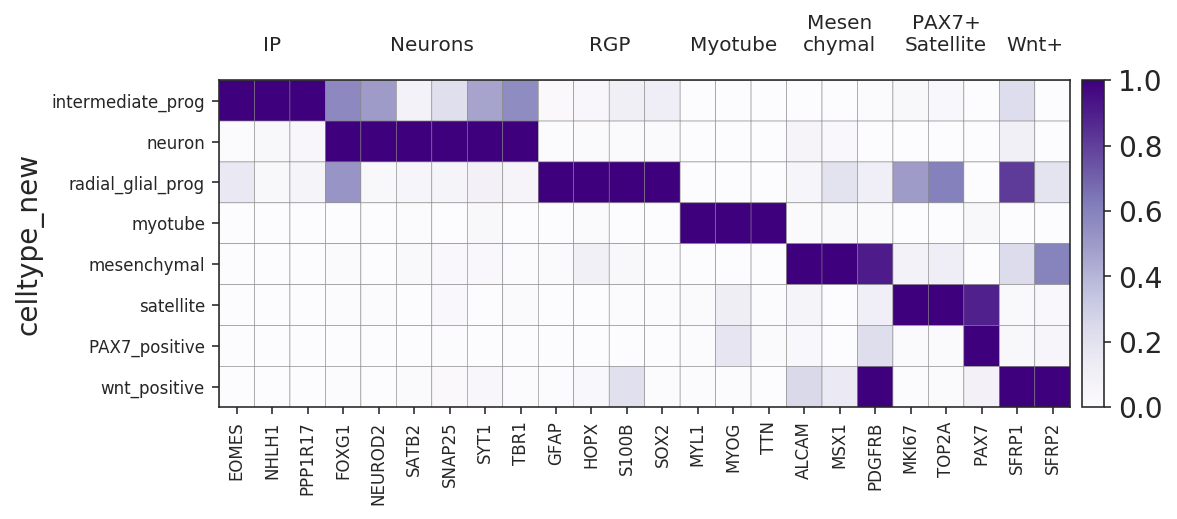

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[7.68, 0, 0.2])

In [67]:
Progenitors = ['EOMES','NHLH1', 'PPP1R17']
Neurons = ['FOXG1','NEUROD2','SATB2','SNAP25','SYT1','TBR1']
Glia = ['GFAP','HOPX','S100B','SOX2']
PAX7_pos_Satellite =['MKI67','TOP2A','PAX7']
Myotube = ['MYL1','MYOG','TTN']
Mesenchymal=['ALCAM','MSX1','PDGFRB']
Wnt_pos =['SFRP1','SFRP2']

var_group_positions=[(0,2),(3,8),(9,12),(13,15),(16,18),(19,21),(22,23)]
var_group_labels=['IP','Neurons','RGP','Myotube','Mesen\nchymal','PAX7+\nSatellite','Wnt+']
# var_group_positions=[(0,2)]
# var_group_labels=['Prog']

gene_list=Progenitors+Neurons+Glia+Myotube+Mesenchymal+PAX7_pos_Satellite+Wnt_pos
# gene_list=Progenitors

sc.pl.matrixplot(adata, var_names=gene_list, groupby='celltype_new',  
                 var_group_positions=var_group_positions, 
                 var_group_labels = var_group_labels,
                 standard_scale='var', cmap='Purples',
                 var_group_rotation=0)

In [52]:
fig_prefix = ''
fig_format = 'png'
# fig_format = 'pdf'
sc.set_figure_params(dpi_save=200,format=fig_format)
#rcParams['figure.figsize'] = 5,4
rcParams['figure.figsize'] = 6,4

In [53]:
plotting_fcn = sc.pl.umap

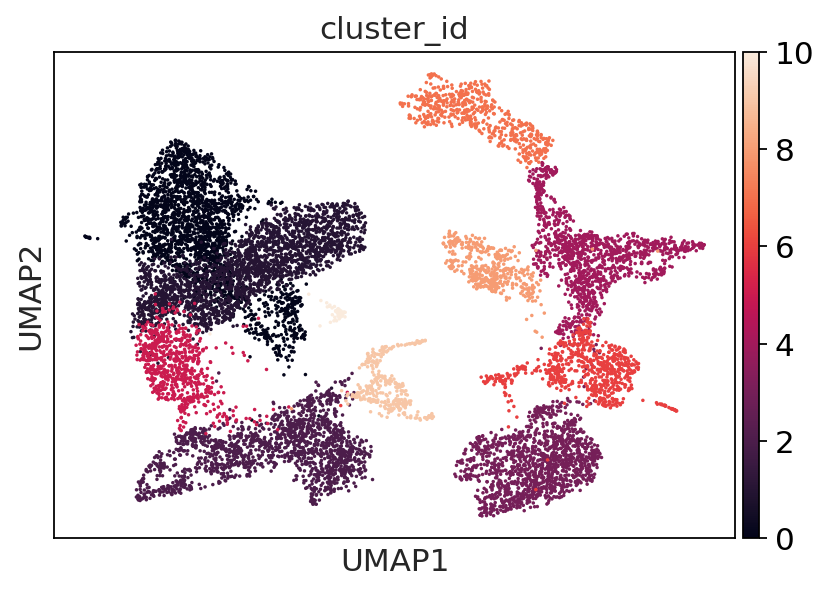

In [17]:
plotting_fcn(adata, color='cluster_id',size=10)

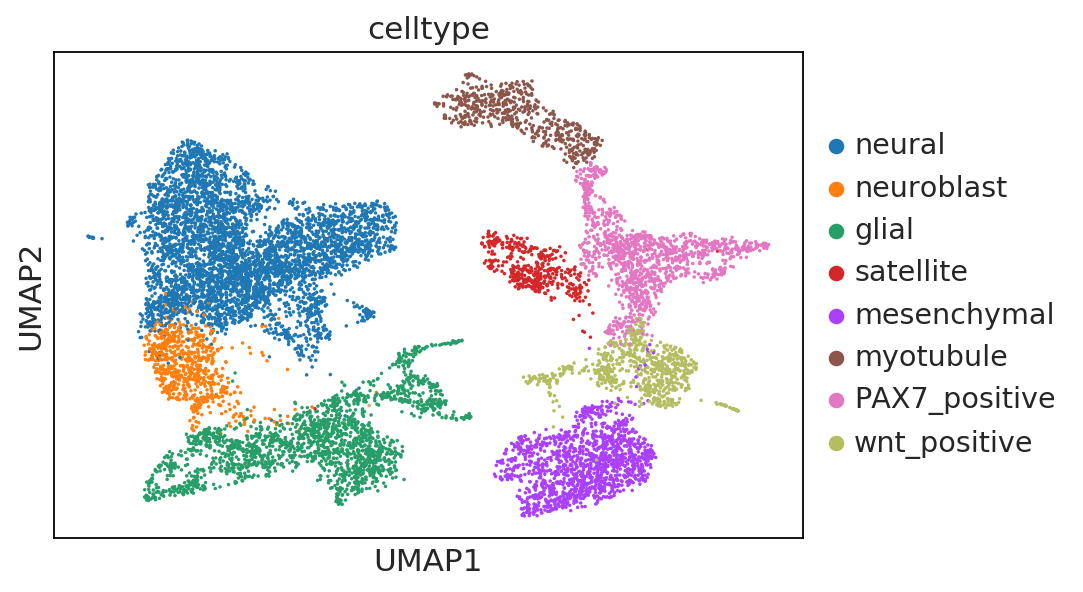

In [18]:
plotting_fcn(adata, color='celltype', size=10)

In [19]:
adata.uns['celltype_colors']

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61']

In [20]:
adata.obs['celltype'].cat.categories

Index(['neural', 'neuroblast', 'glial', 'satellite', 'mesenchymal',
       'myotubule', 'PAX7_positive', 'wnt_positive'],
      dtype='object')

In [21]:
col_neural = 'firebrick'
col_neuroblast = 'gold'
col_glial = 'coral'
col_satellite = '#8c564b'
col_mesenchymal = '#66a5ad'
col_myotubule = '#283655'
col_pax7 =  'darkorchid'
col_wnt = '#b5bd61'

adata.uns['celltype_colors'][0] = col_neural
adata.uns['celltype_colors'][1] = col_neuroblast
adata.uns['celltype_colors'][2] = col_glial
adata.uns['celltype_colors'][3] = col_satellite
adata.uns['celltype_colors'][4] = col_mesenchymal
adata.uns['celltype_colors'][5] = col_myotubule
adata.uns['celltype_colors'][6] = col_pax7
adata.uns['celltype_colors'][7] = col_wnt

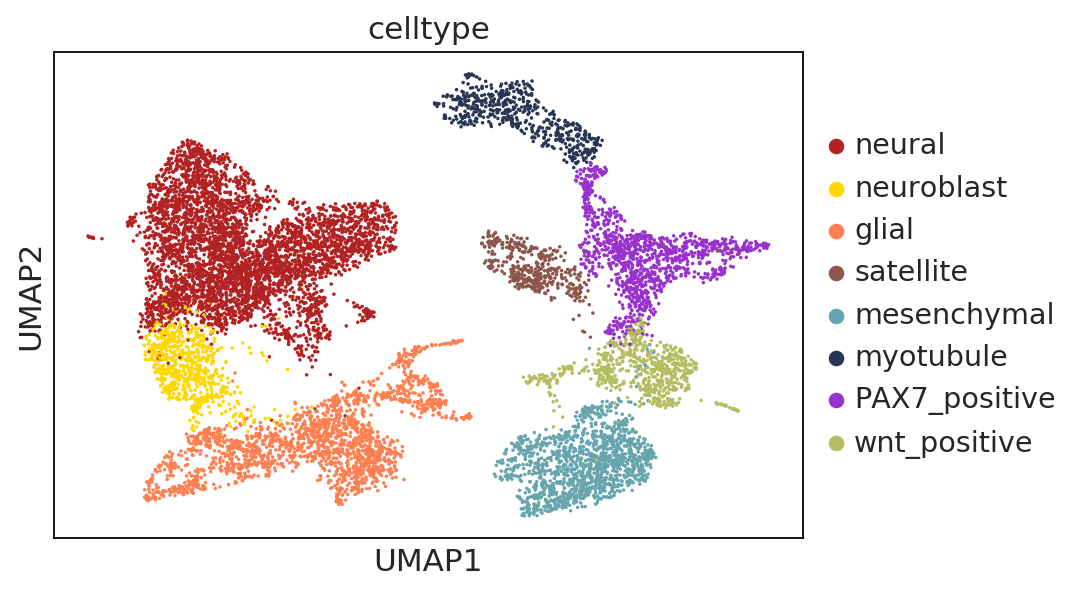

In [22]:
plotting_fcn(adata, color='celltype', size=10)

In [23]:
col_brain = 'royalblue'
col_non_brain = 'forestgreen'

adata.uns['celltype_colors'][0] = col_brain
adata.uns['celltype_colors'][1] = col_brain
adata.uns['celltype_colors'][2] = col_brain
adata.uns['celltype_colors'][3] = col_non_brain
adata.uns['celltype_colors'][4] = col_non_brain
adata.uns['celltype_colors'][5] = col_non_brain
adata.uns['celltype_colors'][6] = col_non_brain
adata.uns['celltype_colors'][7] = col_non_brain

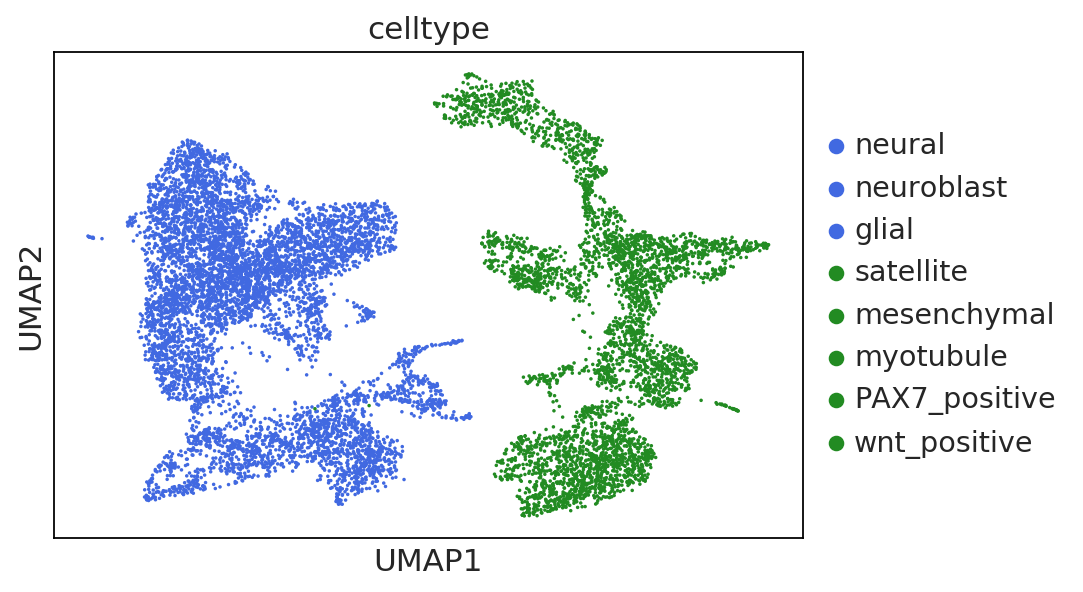

In [24]:
plotting_fcn(adata, color='celltype', size=10)

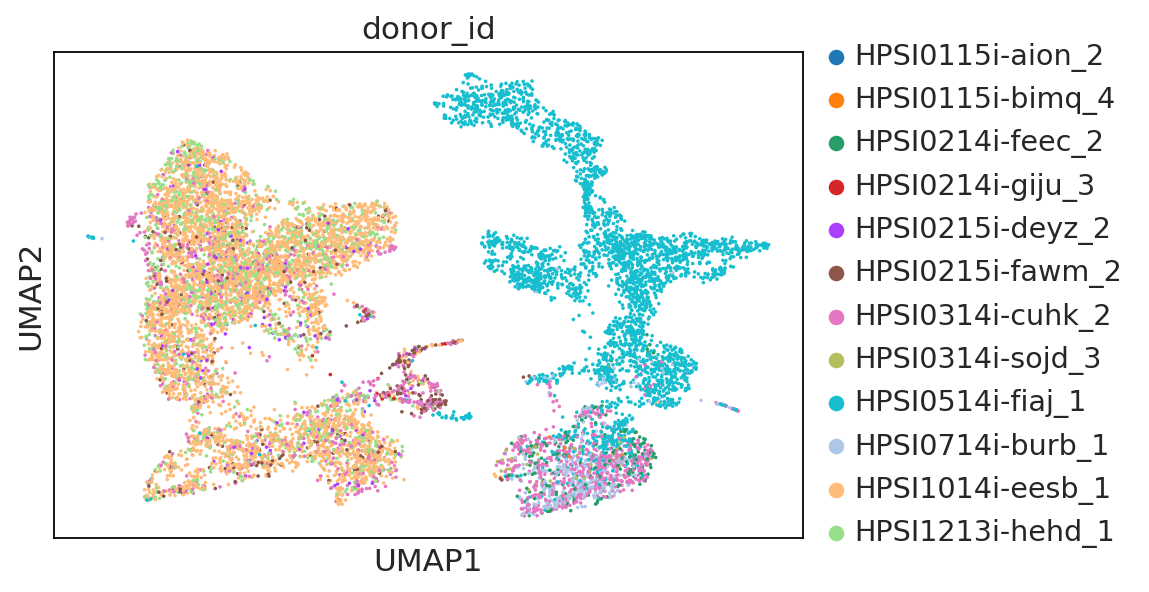

In [25]:
plotting_fcn(adata, color='donor_id')

In [26]:
adata.obs['donor_id'].cat.categories

Index(['HPSI0115i-aion_2', 'HPSI0115i-bimq_4', 'HPSI0214i-feec_2',
       'HPSI0214i-giju_3', 'HPSI0215i-deyz_2', 'HPSI0215i-fawm_2',
       'HPSI0314i-cuhk_2', 'HPSI0314i-sojd_3', 'HPSI0514i-fiaj_1',
       'HPSI0714i-burb_1', 'HPSI1014i-eesb_1', 'HPSI1213i-hehd_1'],
      dtype='object')

In [27]:
adata.uns['donor_id_colors']

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a']

In [28]:
adata.uns['donor_id_colors'][0] = 'lightgrey'
adata.uns['donor_id_colors'][1] = 'lightgrey'
adata.uns['donor_id_colors'][2] = 'lightgrey'
adata.uns['donor_id_colors'][3] = 'lightgrey'
adata.uns['donor_id_colors'][4] = 'lightgrey'
adata.uns['donor_id_colors'][5] = 'lightgrey'
adata.uns['donor_id_colors'][6] = 'lightgrey'
adata.uns['donor_id_colors'][7] = 'lightgrey'
# adata.uns['donor_id_colors'][8] = 'lightgrey'
adata.uns['donor_id_colors'][9] = 'lightgrey'
# adata.uns['donor_id_colors'][10] = 'lightgrey'
adata.uns['donor_id_colors'][11] = 'lightgrey'

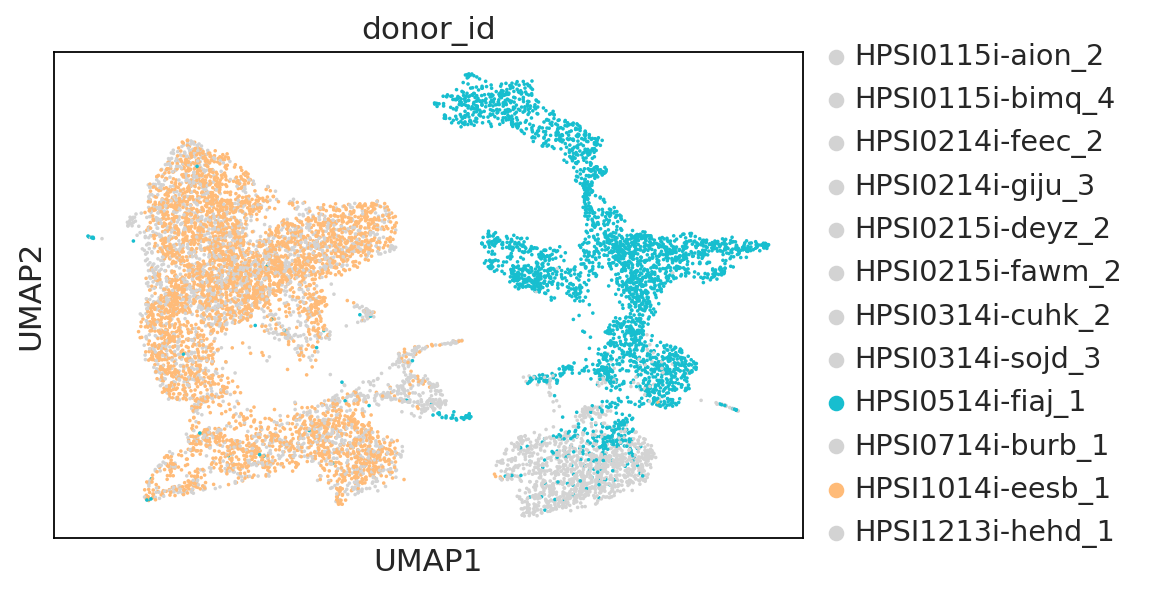

In [29]:
plotting_fcn(adata, color='donor_id')

In [30]:
adata.uns['donor_id_colors'][0] = 'lightgrey'
adata.uns['donor_id_colors'][1] = 'lightgrey'
adata.uns['donor_id_colors'][2] = 'lightgrey'
adata.uns['donor_id_colors'][3] = 'lightgrey'
adata.uns['donor_id_colors'][4] = 'lightgrey'
adata.uns['donor_id_colors'][5] = 'lightgrey'
adata.uns['donor_id_colors'][6] = 'lightgrey'
adata.uns['donor_id_colors'][7] = 'lightgrey'
adata.uns['donor_id_colors'][8] = 'lightgrey'
adata.uns['donor_id_colors'][9] = 'lightgrey'
adata.uns['donor_id_colors'][10] = 'lightgrey'
adata.uns['donor_id_colors'][11] = 'darkblue'

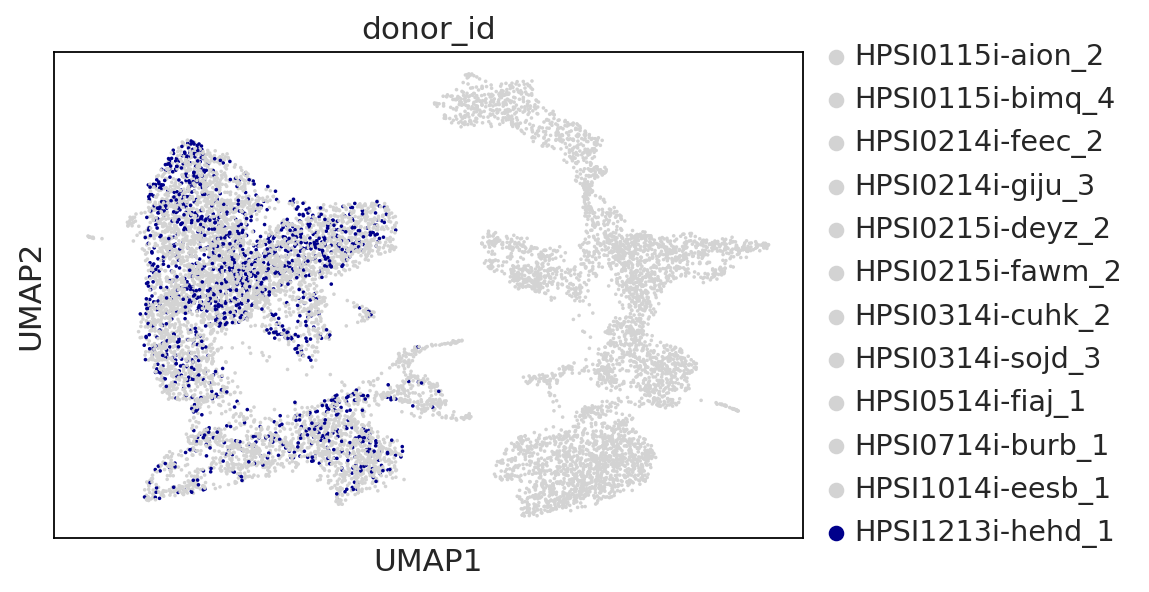

In [31]:
plotting_fcn(adata, color='donor_id')

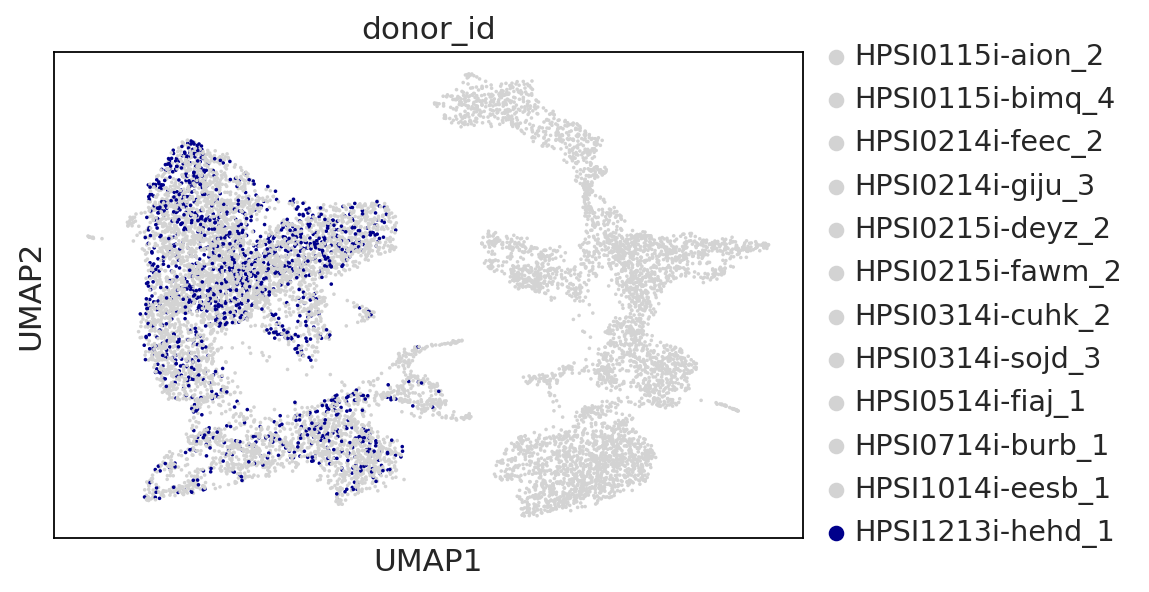

In [32]:
plotting_fcn(adata, color='donor_id')

In [33]:
adata.uns['donor_id_colors'][0] = 'lightgrey'
adata.uns['donor_id_colors'][1] = 'lightgrey'
adata.uns['donor_id_colors'][2] = 'lightgrey'
adata.uns['donor_id_colors'][3] = 'lightgrey'
adata.uns['donor_id_colors'][4] = 'lightgrey'
adata.uns['donor_id_colors'][5] = 'lightgrey'
adata.uns['donor_id_colors'][6] = 'lightgrey'
adata.uns['donor_id_colors'][7] = 'lightgrey'
# adata.uns['donor_id_colors'][8] = 'lightgrey'
adata.uns['donor_id_colors'][9] = 'lightgrey'
adata.uns['donor_id_colors'][10] = 'lightgrey'
adata.uns['donor_id_colors'][11] = 'lightgrey'

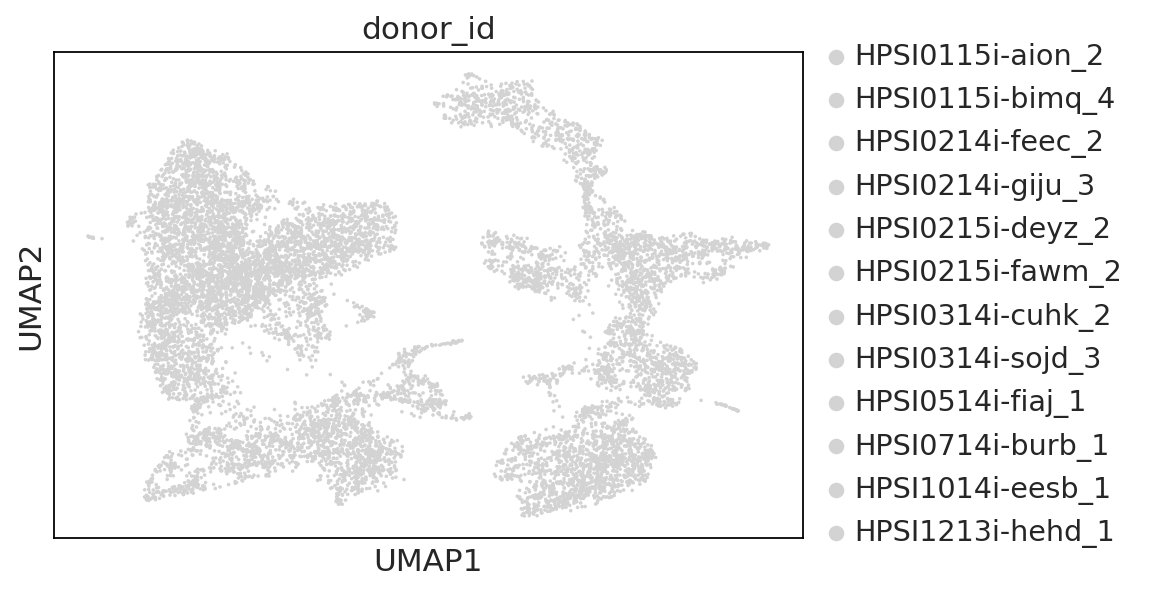

In [34]:
plotting_fcn(adata, color='donor_id')

In [35]:
diff_df = pd.read_csv(mydir+'/data/data_processed/pool1_17_D52/pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.diff_efficiency_by_cell_line.tsv',
                     sep='\t', index_col=0)

# ### to look at UTF1+ cluster instead of diff efficiency
# diff_df = pd.read_csv('/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/scanpy_data/sce_merged_afterqc_filt_allexpts_exprs_20180618.day0.cluster0_fraction.tsv',
#                      sep='\t', index_col=0)
# diff_df.columns = ['diff_efficiency']


diff_df.head()

,diff_efficiency
donor_id,
HPSI0114i-bezi_3,0.582697
HPSI0114i-eipl_1,0.012878
HPSI0114i-fikt_3,0.402827
HPSI0114i-kolf_2,0.470591
HPSI0114i-lexy_2,0.726905


In [36]:
donor_counts = adata.obs.groupby('donor_id').count()['sample_id']

donor_counts

donor_id
HPSI0115i-aion_2       1
HPSI0115i-bimq_4       9
HPSI0214i-feec_2     215
HPSI0214i-giju_3      12
HPSI0215i-deyz_2     175
HPSI0215i-fawm_2     342
HPSI0314i-cuhk_2    1370
HPSI0314i-sojd_3      43
HPSI0514i-fiaj_1    3149
HPSI0714i-burb_1     347
HPSI1014i-eesb_1    4383
HPSI1213i-hehd_1    1398
Name: sample_id, dtype: int64

In [37]:
# neuron_group = [str(x) for x in [0,1,5,2,9]]
celltype_group, name = ['neural','neuroblast','glial'], 'brain'


adata.obs['selected_celltype'] = adata.obs['celltype'].apply(lambda x: name if (x in celltype_group) else 'non-'+name)

adata.obs.head()

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,...,total_counts,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype,celltype_new,selected_celltype
index,,,,,,,,,,,,,,,,,,,,,
GCGCGATAGCTAAACA-1-1,1,HPSI0514i-fiaj_1,8.454253,10.265070,6.335054,4694,48.061719,59.806346,72.153530,34.439762,...,28711.0,563.0,7,D119,pool4,NONE,28711.0,myotubule,myotube,non-brain
CCCTCCTCATTAGGCT-1-1,1,HPSI0514i-fiaj_1,8.153925,9.811098,5.568345,3476,56.153340,65.213338,75.117912,39.667654,...,18234.0,261.0,8,D119,pool4,NONE,18234.0,satellite,satellite,non-brain
GGGCACTCAAACTGCT-1-0,0,HPSI0314i-cuhk_2,7.838343,8.894670,2.708050,2535,41.182117,51.357652,65.935272,27.975864,...,7292.0,14.0,1,D119,pool4,NONE,7292.0,neural,neuron,brain
GTGCTTCCACTTAAGC-1-1,1,HPSI0514i-fiaj_1,8.487970,10.467579,6.369901,4855,50.802139,61.716350,73.230743,33.917397,...,35156.0,583.0,8,D119,pool4,NONE,35156.0,satellite,satellite,non-brain
TCTGAGAGTCGTGGCT-1-0,0,HPSI1014i-eesb_1,7.545918,8.410499,4.406719,1892,40.351658,51.480080,67.282439,28.755842,...,4493.0,81.0,0,D119,pool4,NONE,4493.0,neural,neuron,brain


In [38]:
f_df = adata.obs.groupby(['donor_id','selected_celltype']).count()['sample_id'].fillna(0.0)

f_df = f_df.reset_index()

f_df['f_cells'] = f_df.apply(lambda x: x['sample_id']/donor_counts[x['donor_id']], axis=1)

brain_df = f_df.pivot(index='donor_id', values='f_cells', columns='selected_celltype')[['brain']].rename(columns={'brain':'selected_fraction'})

brain_df

selected_celltype,selected_fraction
donor_id,
HPSI0115i-aion_2,1.000000
HPSI0115i-bimq_4,0.000000
HPSI0214i-feec_2,0.000000
HPSI0214i-giju_3,1.000000
HPSI0215i-deyz_2,1.000000
HPSI0215i-fawm_2,0.985380
HPSI0314i-cuhk_2,0.571533
HPSI0314i-sojd_3,0.000000
HPSI0514i-fiaj_1,0.020641


In [39]:
brain_df.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/organoid_brain_fraction.csv")

... storing 'selected_celltype' as categorical


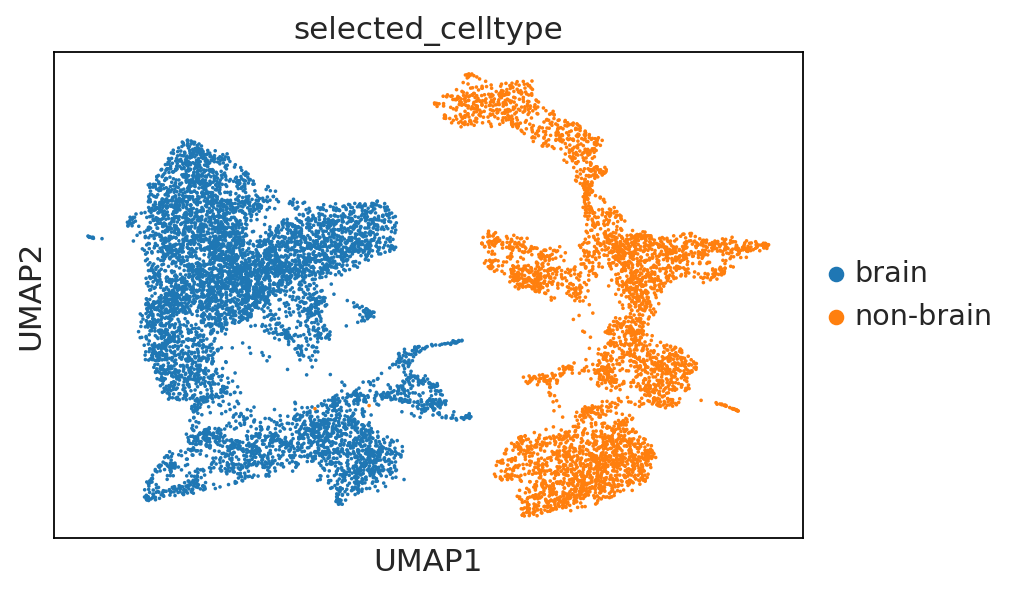

In [37]:
sc.pl.umap(adata, color='selected_celltype')

0.9375642713921091 2.0303911338523064e-05


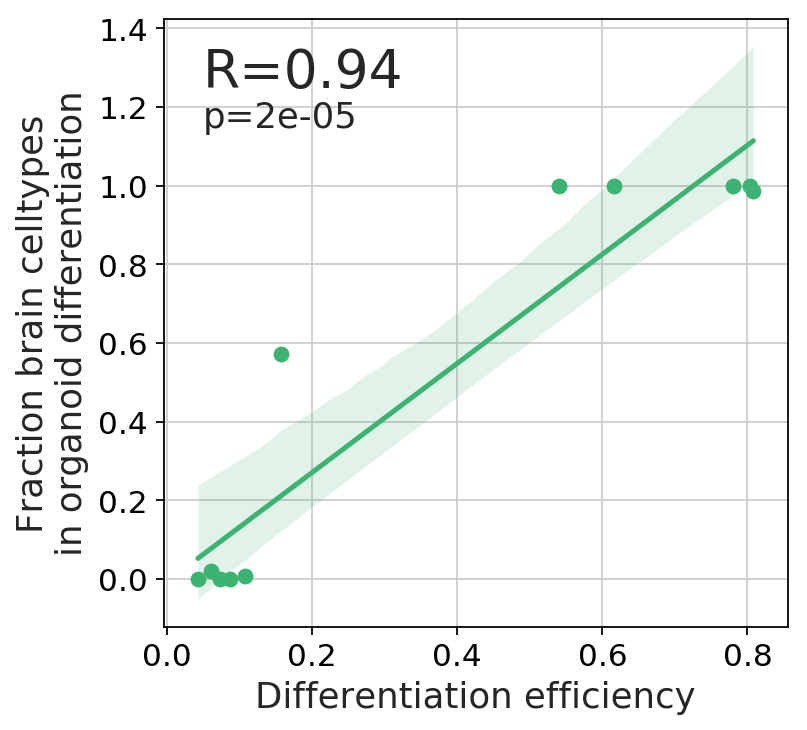

In [38]:
df = brain_df.join(diff_df, how='inner')

donor_counts = adata.obs['donor_id'].value_counts()
donor_list = donor_counts[donor_counts>=5].index

df = df.loc[donor_list,:].dropna()


fig = figure(figsize=(5,5))
FS = 16 # size of text

x_data, y_data = df['diff_efficiency'], df['selected_fraction']

plot(x_data, y_data,'o',color='mediumseagreen')
sns.set_style("ticks")
sns.regplot(x=x_data, y=y_data, color='mediumseagreen')
xlabel('Differentiation efficiency', fontsize=FS)
ylabel('Fraction brain celltypes\nin organoid differentiation', fontsize=FS)

R,p = scipy.stats.pearsonr(x_data,y_data)
text(0.05,1.25,s='R={:.2f}'.format(R),fontsize=24)
if p<0.01:
    text(0.05,1.15,s='p={:.0e}'.format(p),fontsize=FS)
else:
    text(0.05,1.15,s='p={:.2f}'.format(p),fontsize=FS)

print(R,p)

R,p = scipy.stats.spearmanr(x_data,y_data)

0.9375642713921091 2.0303911338523064e-05


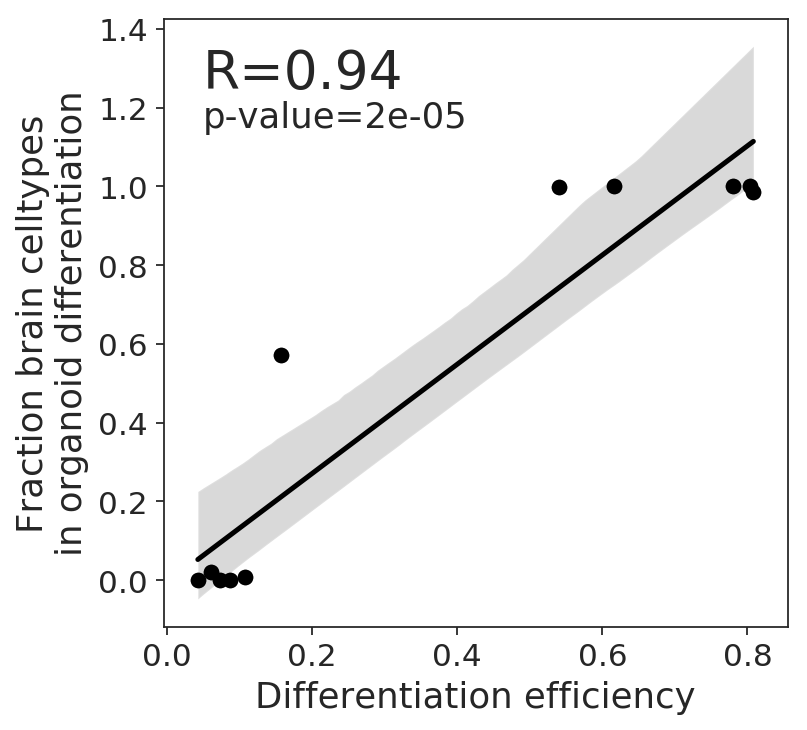

In [39]:
df = brain_df.join(diff_df, how='inner')

donor_counts = adata.obs['donor_id'].value_counts()
donor_list = donor_counts[donor_counts>=5].index

df = df.loc[donor_list,:].dropna()


fig = figure(figsize=(5,5))
FS = 16 # size of text

x_data, y_data = df['diff_efficiency'], df['selected_fraction']

plot(x_data, y_data,'o',color='k')

sns.regplot(x=x_data, y=y_data, color='k')
xlabel('Differentiation efficiency', fontsize=FS)
ylabel('Fraction brain celltypes\nin organoid differentiation', fontsize=FS)

R,p = scipy.stats.pearsonr(x_data,y_data)
text(0.05,1.25,s='R={:.2f}'.format(R),fontsize=24)
if p<0.01:
    text(0.05,1.15,s='p-value={:.0e}'.format(p),fontsize=FS)
else:
    text(0.05,1.15,s='p-value={:.2f}'.format(p),fontsize=FS)

print(R,p)

R,p = scipy.stats.spearmanr(x_data,y_data)